In [2376]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')

In [2377]:
%matplotlib inline

In [2378]:
cd C:\Users\Costa\Desktop\Adobe

C:\Users\Costa\Desktop\Adobe


In [2379]:
df = pd.read_csv('MothersDayUSUK.csv')

In [2380]:
df.describe()

,website,conversion,average order value
count,836825.000000,836361.000000,7.076900e+05
mean,2227.113466,0.037291,7.171403e+03
std,686.754982,0.190236,2.682730e+06
min,1000.000000,0.000000,-1.300600e+02
25%,1624.000000,0.002370,4.999000e+01
50%,2266.000000,0.011739,1.008339e+02
75%,2814.000000,0.030228,2.372012e+02
max,3385.000000,51.627907,2.056873e+09


In [2381]:
df.head()

,country,website,date,conversion,average order value
0,United Kingdom,1000,2/1/2010,0.006123,21.962882
1,United Kingdom,1000,2/2/2010,0.006380,26.405734
2,United Kingdom,1000,2/3/2010,0.007431,25.195461
3,United Kingdom,1000,2/4/2010,0.006716,27.311377
4,United Kingdom,1000,2/5/2010,0.007141,23.945930


In [2382]:
df["Avg_value_per_visit"] = df["conversion"]*df["average order value"]

In [2383]:
# def norm_by_data2(x):
#     # x is a DataFrame of group values
#     x['conversion_normalized'] = x['conversion']/x['conversion'].mean()-1
#     return x

# df = df.groupby('website').apply(norm_by_data2)

In [2384]:
# def norm_by_data2(x):
#     # x is a DataFrame of group values
#     x['value_normalized'] = x['average order value']/x['average order value'].mean()-1
#     return x

# df = df.groupby('website').apply(norm_by_data2)

def norm_by_data2(x):
    # x is a DataFrame of group values
    x['average order value'] = x['average order value']/x['average order value'].mean()-1
    return x

USconversion2010 = USconversion2010.groupby('website').apply(norm_by_data2)
USconversion2011 = USconversion2011.groupby('website').apply(norm_by_data2)
USconversion2012 = USconversion2012.groupby('website').apply(norm_by_data2)
USconversion2013 = USconversion2013.groupby('website').apply(norm_by_data2)

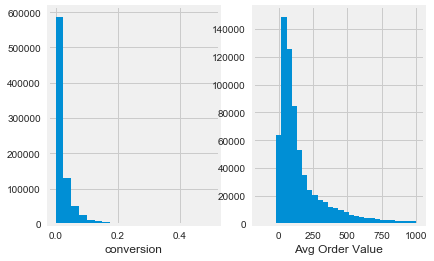

In [2385]:
fig, axes = plt.subplots(nrows = 1 , ncols=2)

temp = df.conversion[df.conversion <0.5]
temp.hist(bins = 20, ax = axes[0]);
axes[0].set(xlabel = "conversion")
temp1 = df['average order value'][(df['average order value']<1000)]
temp1.hist(bins = 30, ax = axes[1]);
axes[1].set(xlabel = 'Avg Order Value');

In [2386]:
# fig, axes = plt.subplots(nrows = 1 , ncols=2)

# temp = df.conversion_normalized[df.conversion_normalized <3]
# temp.hist(bins = 20, ax = axes[0], edgecolor='#E6E6E6');
# axes[0].set(xlabel = "normalized conversion")
# temp1 = df['value_normalized'][(df['value_normalized']<3)]
# temp1.hist(bins = 30, ax = axes[1], edgecolor='#E6E6E6');
# axes[1].set(xlabel = 'normalized Avg Order Value');

In [2387]:
# df[df["value_normalized"]>4].count()

In [2388]:
print("Number of data points with Conversion above 4: ",df[df["conversion"]>4].count()[0])
# Number of data points with Conversion > 4

Number of data points with Conversion above 4:  460


In [2389]:
print("Number of data points with Average Order Value above 5000: ",df[df["average order value"]>5000].count()[0])

Number of data points with Average Order Value above 5000:  3346


# Get rid of outliers

In [2390]:
# df = df[df.conversion_normalized<4]
df = df[df.conversion<0.5]
df = df[df.conversion>0]
# df = df[df.value_normalized<5]
df = df[df["average order value"]<5000]
df = df[df["average order value"]>0]

# Split into years

In [2391]:
df.date= pd.to_datetime(df.date)

In [2392]:
df=df.sort_values("date")

In [2393]:
df2010 = df[(df.date>'20100101')& (df.date<'20100901')]
df2011 = df[(df.date>'20110101')& (df.date<'20110901')]
df2012 = df[(df.date>'20120101')& (df.date<'20120901')]
df2013 = df[(df.date>'20130101')& (df.date<'20130901')]

# Split Into Countries

In [2394]:
df2010US = df2010[df2010.country == "United States"]
df2011US = df2011[df2011.country == "United States"]
df2012US = df2012[df2012.country == "United States"]
df2013US = df2013[df2013.country == "United States"]

df2010UK = df2010[df2010.country == "United Kingdom"]
df2011UK = df2011[df2011.country == "United Kingdom"]
df2012UK = df2012[df2012.country == "United Kingdom"]
df2013UK = df2013[df2013.country == "United Kingdom"]

In [2395]:
# def norm_by_data2(x):
#     # x is a DataFrame of group values
#     x['conversion_normalized'] = x['conversion']/x['conversion'].mean()-1
#     x['value_normalized'] = x['average order value']/x['average order value'].mean()-1
#     return x

# df2010US = df2010US.groupby('website').apply(norm_by_data2)
# df2011US = df2011US.groupby('website').apply(norm_by_data2)
# df2012US = df2012US.groupby('website').apply(norm_by_data2)
# df2013US = df2013US.groupby('website').apply(norm_by_data2)

# df2010UK = df2010UK.groupby('website').apply(norm_by_data2)
# df2011UK = df2011UK.groupby('website').apply(norm_by_data2)
# df2012UK = df2012UK.groupby('website').apply(norm_by_data2)
# df2013UK = df2013UK.groupby('website').apply(norm_by_data2)

# United States

## Plot Conversion

In [2396]:
USconversion2010 = df2010US.groupby(['date', 'country']).mean()['conversion'].unstack().resample("W")
USconversion2011 = df2011US.groupby(['date', 'country']).mean()['conversion'].unstack().resample("W")
USconversion2012 = df2012US.groupby(['date', 'country']).mean()['conversion'].unstack().resample("W")
USconversion2013 = df2013US.groupby(['date', 'country']).mean()['conversion'].unstack().resample("W")

C:\Users\Costa\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
C:\Users\Costa\Miniconda3\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
C:\Users\Costa\Miniconda3\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
C:\Users\Costa\Miniconda3\lib\site-packages\ipykernel\__main__.py:38: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object wh

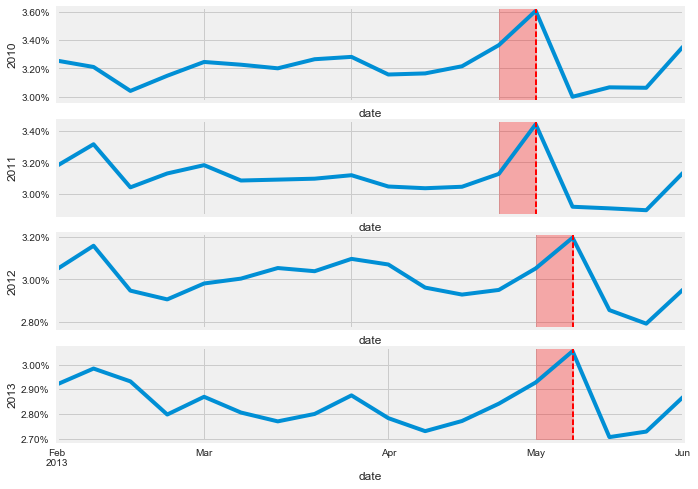

In [2397]:
fig, axes = plt.subplots(nrows = 4 , ncols=1, figsize = (10,8))
ymax = 0.052
ymin = 0.03

fig1 = USconversion2010.plot(ax = axes[0]);
fig1.tick_params(labelbottom='off')
fig1.set_ylabel('2010')
fig1.axvspan('2010-05-01','2010-05-09', color='red', alpha=0.3)
# fig1.axvspan('2010-04-23','2010-05-01', color='yellow', alpha=0.5)
# fig1.axvspan('2010-05-09','2010-05-17', color='yellow', alpha=0.5)
fig1.axvline(pd.to_datetime('2010-05-09'), color='r', linestyle='--', lw=2)
vals = fig1.get_yticks()
fig1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig1.legend_.remove()

fig2 = USconversion2011.plot(ax = axes[1]);
fig2.tick_params(labelbottom='off')
fig2.set_ylabel('2011')
fig2.axvline(pd.to_datetime('2011-05-08'), color='r', linestyle='--', lw=2)
fig2.axvspan('2011-04-30','2011-05-08', color='red', alpha=0.3)
# fig2.axvspan('2011-04-22','2011-04-30', color='yellow', alpha=0.5)
# fig2.axvspan('2011-05-08','2011-05-16', color='yellow', alpha=0.5)
vals = fig2.get_yticks()
fig2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig2.legend_.remove()

fig3 = USconversion2012.plot(ax = axes[2]);
fig3.tick_params(labelbottom='off')
fig3.set_ylabel('2012')
fig3.axvline(pd.to_datetime('2012-05-13'), color='r', linestyle='--', lw=2)
fig3.axvspan('2012-05-05','2012-05-13', color='red', alpha=0.3)
# fig3.axvspan('2012-04-27','2012-05-05', color='yellow', alpha=0.5)
# fig3.axvspan('2012-05-13','2012-05-21', color='yellow', alpha=0.5)
vals = fig3.get_yticks()
fig3.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig3.legend_.remove()

fig4 = USconversion2013.plot(ax = axes[3]);
fig4.set_ylabel('2013')
fig4.axvline(pd.to_datetime('2013-05-11'), color='r', linestyle='--', lw=2)
fig4.axvspan('2013-05-03','2013-05-11', color='red', alpha=0.3)
# fig4.axvspan('2013-04-25','2013-05-03', color='yellow', alpha=0.5)
# fig4.axvspan('2013-05-11','2013-05-19', color='yellow', alpha=0.5)
vals = fig4.get_yticks()
fig4.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig4.legend_.remove()
fig4.xaxis.grid(True)

# xfmt = mdates.DateFormatter('%d-%m')
# fig4.xaxis.set_major_formatter(xfmt)

fig.savefig("US_conversion_percent.png", transparent=True)

## Find Conversion Lift

In [2398]:
USconversion2010 = df2010US.groupby(['date', 'country']).mean()['conversion'].unstack()
USconversion2011 = df2011US.groupby(['date', 'country']).mean()['conversion'].unstack()
USconversion2012 = df2012US.groupby(['date', 'country']).mean()['conversion'].unstack()
USconversion2013 = df2013US.groupby(['date', 'country']).mean()['conversion'].unstack()

In [2399]:
mothersweek2010 =USconversion2010['2010-05-01':'2010-05-09'].mean().values[0]
around_mothersweek2010 = np.mean([USconversion2010['2010-04-23':'2010-04-30'].mean().values[0],USconversion2010['2010-05-10':'2010-05-17'].mean().values[0]])
USconversionlift2010 = (mothersweek2010-around_mothersweek2010)/mothersweek2010

mothersweek2011 =USconversion2011['2011-04-30':'2011-05-08'].mean().values[0]
around_mothersweek2011 = np.mean([USconversion2011['2011-04-22':'2011-04-29'].mean().values[0],USconversion2011['2011-05-09':'2011-05-16'].mean().values[0]])
USconversionlift2011 = (mothersweek2011-around_mothersweek2011)/mothersweek2011

mothersweek2012 =USconversion2012['2012-05-05':'2012-05-13'].mean().values[0]
around_mothersweek2012 = np.mean([USconversion2012['2012-04-28':'2012-05-04'].mean().values[0],USconversion2012['2012-05-14':'2012-05-20'].mean().values[0]])
USconversionlift2012 = (mothersweek2012-around_mothersweek2012)/mothersweek2012

mothersweek2013 =USconversion2013['2013-05-03':'2013-05-11'].mean().values[0]
around_mothersweek2013 = np.mean([USconversion2013['2013-04-25':'2013-05-02'].mean().values[0],USconversion2013['2013-05-12':'2013-05-17'].mean().values[0]])
USconversionlift2013 = (mothersweek2013-around_mothersweek2013)/mothersweek2013


In [2400]:
USconversionlifts=pd.Series([USconversionlift2010,USconversionlift2011,USconversionlift2012,USconversionlift2013])
USconversionlift_Mothers_day = USconversionlifts.mean()
USconversionlift_Mothers_day

0.10161809475010779

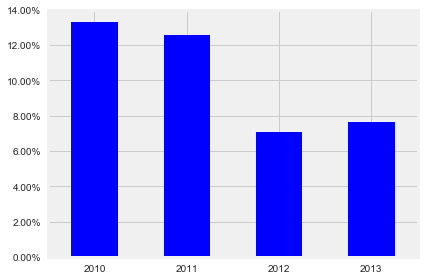

In [2401]:
ax = USconversionlifts.plot(kind="bar", color ="blue")
years =[2010,2011,2012,2013]
x = [0,1,2,3];
plt.xticks(x, years, rotation='horizontal');
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]);
plt.tight_layout()
plt.savefig("US conversion bar chart.png", transparent= True)

# Conversion Lift Compared to Average for Feb- May

In [2402]:
mothersweek2010 =USconversion2010['2010-05-01':'2010-05-09'].mean().values[0]
around_mothersweek2010 = USconversion2010.mean().values[0]
USconversionlift2010 = (mothersweek2010-around_mothersweek2010)/mothersweek2010

mothersweek2011 =USconversion2011['2011-04-30':'2011-05-08'].mean().values[0]
around_mothersweek2011 = USconversion2011.mean().values[0]
USconversionlift2011 = (mothersweek2011-around_mothersweek2011)/mothersweek2011

mothersweek2012 =USconversion2012['2012-05-05':'2012-05-13'].mean().values[0]
around_mothersweek2012 = USconversion2012.mean().values[0]
USconversionlift2012 = (mothersweek2012-around_mothersweek2012)/mothersweek2012

mothersweek2013 =USconversion2013['2013-05-03':'2013-05-11'].mean().values[0]
around_mothersweek2013 = USconversion2013.mean().values[0]
USconversionlift2013 = (mothersweek2013-around_mothersweek2013)/mothersweek2013

In [2403]:
USconversionlifts=pd.Series([USconversionlift2010,USconversionlift2011,USconversionlift2012,USconversionlift2013])
USconversionlift_Mothers_day = USconversionlifts.mean()
USconversionlift_Mothers_day

0.079539678332710473

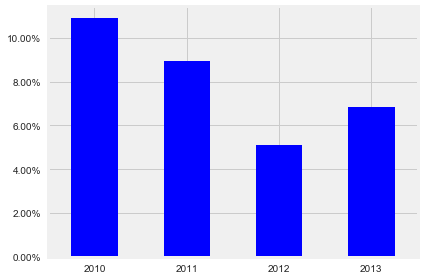

In [2404]:
ax = USconversionlifts.plot(kind="bar", color ="blue")
years =[2010,2011,2012,2013]
x = [0,1,2,3];
plt.xticks(x, years, rotation='horizontal');
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]);
plt.tight_layout()
plt.savefig("US conversion bar chart.png", transparent= True)

# United Kingdom

## Conversion

In [2405]:
UKconversion2010 = df2010UK.groupby(['date', 'country']).mean()['conversion'].unstack().resample("W-Sun")
UKconversion2011 = df2011UK.groupby(['date', 'country']).mean()['conversion'].unstack().resample("W-Sun")
UKconversion2012 = df2012UK.groupby(['date', 'country']).mean()['conversion'].unstack().resample("W-Sun")
UKconversion2013 = df2013UK.groupby(['date', 'country']).mean()['conversion'].unstack().resample("W-Sun")

C:\Users\Costa\Miniconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
C:\Users\Costa\Miniconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
C:\Users\Costa\Miniconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
C:\Users\Costa\Miniconda3\lib\site-packages\ipykernel\__main__.py:41: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object wh

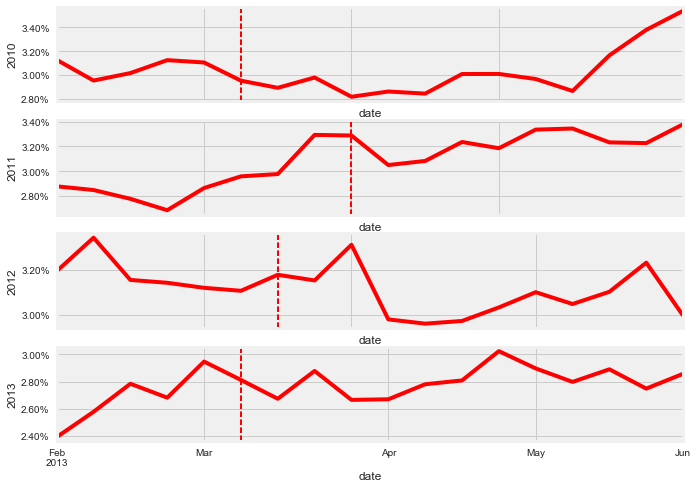

In [2406]:
fig, axes = plt.subplots(nrows = 4 , ncols=1, figsize = (10,8))
ymax = 0.065
ymin = 0.03

fig1 = UKconversion2010.plot(ax = axes[0], color = "red");
fig1.tick_params(labelbottom='off')  
# fig1.axes.xaxis.set_visible(False)
fig1.set_ylabel('2010')
fig1.axvline(pd.to_datetime('2010-03-14'), color='r', linestyle='--', lw=2)
# fig1.axvspan('2010-03-06','2010-03-14', color='red', alpha=0.3)
# fig1.axvspan('2010-02-26','2010-03-06', color='yellow', alpha=0.6)
# fig1.axvspan('2010-03-14','2010-03-22', color='yellow', alpha=0.6)
vals = fig1.get_yticks()
fig1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig1.legend_.remove()

fig2 = UKconversion2011.plot(ax = axes[1], color = "red");
# fig2.axes.xaxis.set_visible(False)
fig2.tick_params(labelbottom='off') 
fig2.set_ylabel('2011')
fig2.axvline(pd.to_datetime('2011-04-03'), color='r', linestyle='--', lw=2)
# fig2.axvspan('2011-03-26','2011-04-03', color='red', alpha=0.3)
# fig2.axvspan('2011-03-18','2011-03-26', color='yellow', alpha=0.6)
# fig2.axvspan('2011-04-03','2011-04-11', color='yellow', alpha=0.6)
vals = fig2.get_yticks()
fig2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig2.legend_.remove()

fig3 = UKconversion2012.plot(ax = axes[2], color = "red");
fig3.tick_params(labelbottom='off') 
# fig3.axes.xaxis.set_visible(False)
fig3.set_ylabel('2012')
fig3.axvline(pd.to_datetime('2012-03-18'), color='r', linestyle='--', lw=2)
# fig3.axvspan('2012-03-10','2012-03-18', color='red', alpha=0.3)
# fig3.axvspan('2012-03-02','2012-03-10', color='yellow', alpha=0.6)
# fig3.axvspan('2012-03-18','2012-03-26', color='yellow', alpha=0.6)
vals = fig3.get_yticks()
fig3.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig3.legend_.remove()

fig4 = UKconversion2013.plot(ax = axes[3], color = "red");
fig4.set_ylabel('2013')
fig4.axvline(pd.to_datetime('2013-03-10'), color='r', linestyle='--', lw=2)
# fig4.axvspan('2013-03-02','2013-03-10', color='red', alpha=0.3)
# fig4.axvspan('2013-02-22','2013-03-02', color='yellow', alpha=0.6)
# fig4.axvspan('2013-03-10','2013-03-18', color='yellow', alpha=0.6)
vals = fig4.get_yticks()
fig4.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig4.legend_.remove()

# xfmt = mdates.DateFormatter('%d-%m')
# fig4.xaxis.set_major_formatter(xfmt)

fig.savefig("UK_conversion_percent.png", transparent=True)

In [2407]:
UKconversion2010 = df2010UK.groupby(['date', 'country']).mean()['conversion'].unstack()
UKconversion2011 = df2011UK.groupby(['date', 'country']).mean()['conversion'].unstack()
UKconversion2012 = df2012UK.groupby(['date', 'country']).mean()['conversion'].unstack()
UKconversion2013 = df2013UK.groupby(['date', 'country']).mean()['conversion'].unstack()

In [2408]:
mothersweek2010 =UKconversion2010['2010-03-05':'2010-03-12'].mean().values[0]
around_mothersweek2010 = np.mean([UKconversion2010['2010-02-28':'2010-03-04'].mean().values[0],UKconversion2010['2010-03-13':'2010-03-20'].mean().values[0]])
UKconversionlift2010 = (mothersweek2010-around_mothersweek2010)/mothersweek2010

mothersweek2011 =UKconversion2011['2011-03-24':'2011-04-01'].mean().values[0]
around_mothersweek2011 = np.mean([UKconversion2011['2011-03-12':'2011-03-23'].mean().values[0],UKconversion2011['2011-04-02':'2011-04-09'].mean().values[0]])
UKconversionlift2011 = (mothersweek2011-around_mothersweek2011)/mothersweek2011

mothersweek2012 =UKconversion2012['2012-03-10':'2012-03-18'].mean().values[0]
around_mothersweek2012 = np.mean([UKconversion2012['2012-03-02':'2012-05-09'].mean().values[0],UKconversion2012['2012-03-19':'2012-03-25'].mean().values[0]])
UKconversionlift2012 = (mothersweek2012-around_mothersweek2012)/mothersweek2012

mothersweek2013 =UKconversion2013['2013-02-28':'2013-03-08'].mean().values[0]
around_mothersweek2013 = np.mean([UKconversion2013['2013-02-20':'2013-03-27'].mean().values[0],UKconversion2013['2013-03-09':'2013-03-16'].mean().values[0]])
UKconversionlift2013 = (mothersweek2013-around_mothersweek2013)/mothersweek2013


In [2409]:
UKconversionlifts=pd.Series([UKconversionlift2010,UKconversionlift2011,UKconversionlift2012,UKconversionlift2013])

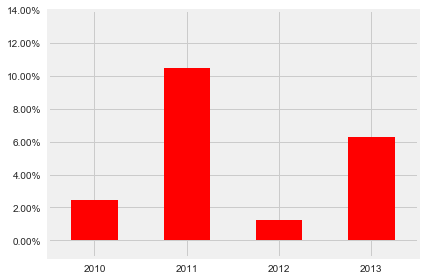

In [2410]:
ax = UKconversionlifts.plot(kind="bar", color = 'red', ylim = [-0.01,0.14])
years =[2010,2011,2012,2013]
plt.xticks(x, years, rotation='horizontal');
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]);
plt.tight_layout()
plt.savefig("UK conversion bar chart.png", transparent= True)



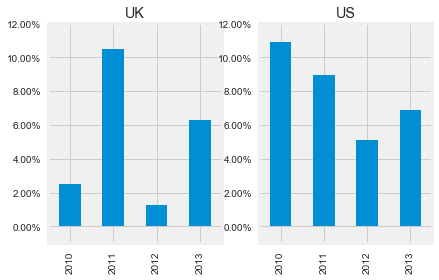

In [2411]:
fig, axes = plt.subplots(nrows = 1 , ncols=2)
fig1 = UKconversionlifts.plot(ax = axes[0], kind="bar", ylim = [-0.01,0.12])
years =[2010,2011,2012,2013]
x = [0,1,2,3];
fig1.set_xticklabels([2010,2011,2012,2013])
fig1.set_title("UK");

fig2 = USconversionlifts.plot(ax = axes[1], kind="bar",ylim = [-0.01,0.12])
years =[2010,2011,2012,2013]
fig2.set_xticklabels([2010,2011,2012,2013])
fig2.set_title("US");
plt.tight_layout(h_pad = 100)

vals = fig1.get_yticks();
fig1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]);
vals = fig2.get_yticks();
fig2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]);

# UK conversion Lift Compared to 5 Month Average

In [2412]:
mothersweek2010 =UKconversion2010['2010-05-01':'2010-05-09'].mean().values[0]
around_mothersweek2010 = UKconversion2010.mean().values[0]
UKconversionlift2010 = (mothersweek2010-around_mothersweek2010)/mothersweek2010

mothersweek2011 =UKconversion2011['2011-04-30':'2011-05-08'].mean().values[0]
around_mothersweek2011 = UKconversion2011.mean().values[0]
UKconversionlift2011 = (mothersweek2011-around_mothersweek2011)/mothersweek2011

mothersweek2012 =UKconversion2012['2012-05-05':'2012-05-13'].mean().values[0]
around_mothersweek2012 = UKconversion2012.mean().values[0]
UKconversionlift2012 = (mothersweek2012-around_mothersweek2012)/mothersweek2012

mothersweek2013 =UKconversion2013['2013-05-03':'2013-05-11'].mean().values[0]
around_mothersweek2013 = UKconversion2013.mean().values[0]
UKconversionlift2013 = (mothersweek2013-around_mothersweek2013)/mothersweek2013


In [2413]:
UKconversionlifts=pd.Series([UKconversionlift2010,UKconversionlift2011,UKconversionlift2012,UKconversionlift2013])

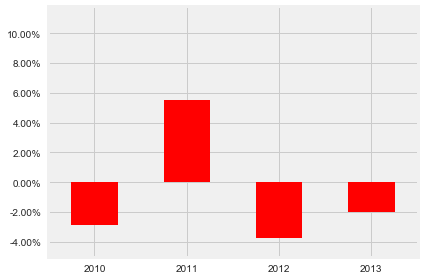

In [2414]:
ax = UKconversionlifts.plot(kind="bar", color = 'red', ylim = [-0.05,0.118])
years =[2010,2011,2012,2013]
plt.xticks(x, years, rotation='horizontal');
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]);
plt.tight_layout()
plt.savefig("UK conversion bar chart.png", transparent= True)



# AVERAGE ORDER VALUE

## US


In [2415]:
USorder_value2010 = df2010US.groupby(['date', 'country']).mean()["average order value"].unstack()
USorder_value2011 = df2011US.groupby(['date', 'country']).mean()['average order value'].unstack()
USorder_value2012 = df2012US.groupby(['date', 'country']).mean()['average order value'].unstack()
USorder_value2013 = df2013US.groupby(['date', 'country']).mean()['average order value'].unstack()


In [2416]:
USorder_value2010.head()

country,United States
date,
2010-02-01,218.548172
2010-02-02,225.512177
2010-02-03,224.412842
2010-02-04,217.955141
2010-02-05,213.986864


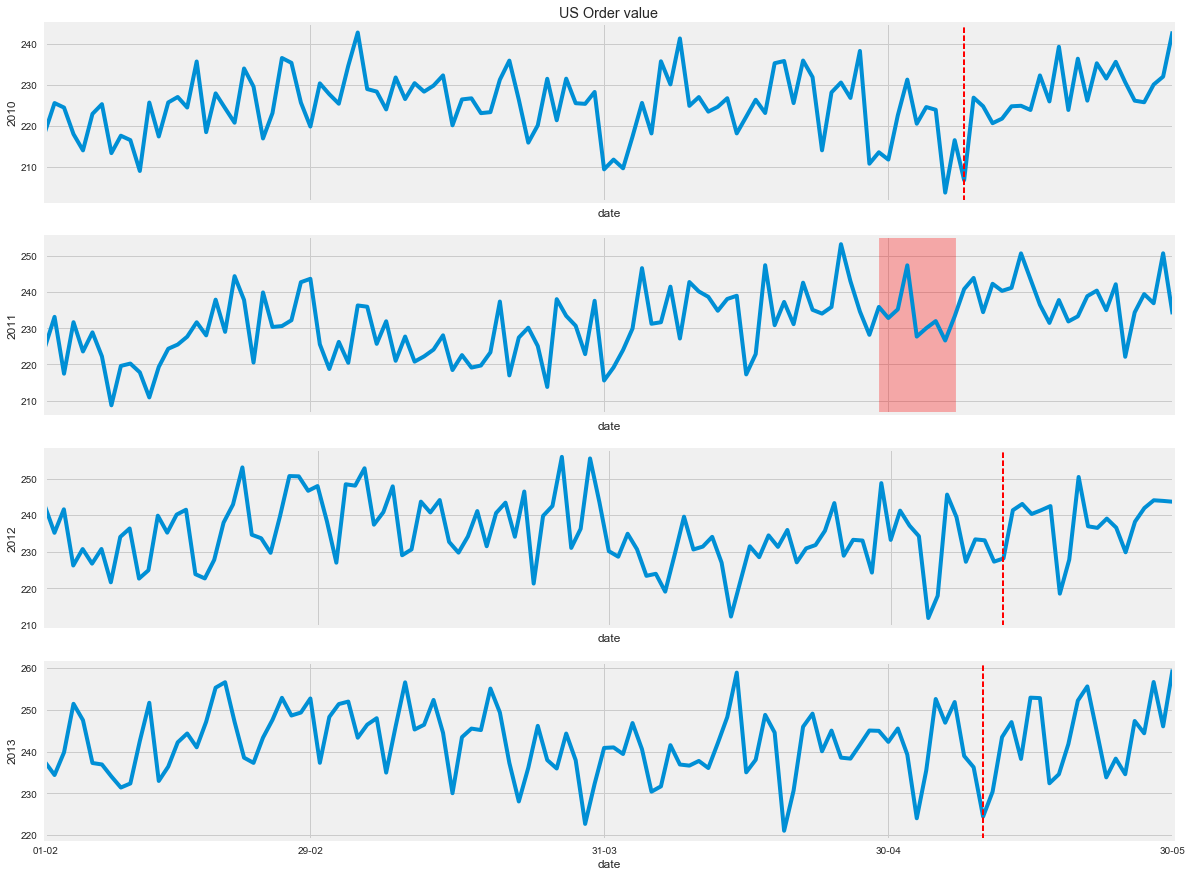

In [2417]:
fig, axes = plt.subplots(nrows = 4 , ncols=1, figsize = (18,15))
ymax = 270
ymin = 200

fig1 = USorder_value2010.plot(ax = axes[0]);
fig1.tick_params(labelbottom='off')
fig1.set_title('US Order value')
fig1.set_ylabel('2010')
# fig1.axvspan('2010-05-01','2010-05-09', color='red', alpha=0.3)
# fig1.axvspan('2010-04-23','2010-05-01', color='yellow', alpha=0.5)
# fig1.axvspan('2010-05-09','2010-05-17', color='yellow', alpha=0.5)
fig1.axvline(pd.to_datetime('2010-05-09'), color='r', linestyle='--', lw=2)
vals = fig1.get_yticks()
# fig1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig1.legend_.remove()

fig2 = USorder_value2011.plot(ax = axes[1]);
fig2.tick_params(labelbottom='off')
fig2.set_ylabel('2011')
# fig2.axvline(pd.to_datetime('2011-05-08'), color='r', linestyle='--', lw=2)
# fig2.axvspan('2011-04-22','2011-04-30', color='yellow', alpha=0.6)
# fig2.axvspan('2011-05-08','2011-05-16', color='yellow', alpha=0.6)
fig2.axvspan('2011-04-30','2011-05-08', color='red', alpha=0.3)
vals = fig2.get_yticks()
# fig2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig2.legend_.remove()

fig3 = USorder_value2012.plot(ax = axes[2]);
fig3.tick_params(labelbottom='off')
fig3.set_ylabel('2012')
fig3.axvline(pd.to_datetime('2012-05-13'), color='r', linestyle='--', lw=2)
# fig3.axvspan('2012-05-05','2012-05-13', color='red', alpha=0.3)
# fig3.axvspan('2012-04-27','2012-05-05', color='yellow', alpha=0.6)
# fig3.axvspan('2012-05-13','2012-05-21', color='yellow', alpha=0.6)
# fig3.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig3.legend_.remove()

fig4 = USorder_value2013.plot(ax = axes[3]);
fig4.set_ylabel('2013')
fig4.axvline(pd.to_datetime('2013-05-11'), color='r', linestyle='--', lw=2)
# fig4.axvspan('2013-05-03','2013-05-11', color='red', alpha=0.3)
# fig4.axvspan('2013-04-25','2013-05-03', color='yellow', alpha=0.6)
# fig4.axvspan('2013-05-11','2013-05-19', color='yellow', alpha=0.6)
# fig4.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig4.legend_.remove()

xfmt = mdates.DateFormatter('%d-%m')
fig4.xaxis.set_major_formatter(xfmt)

fig.savefig("try_1")

In [2418]:
mothersweek2010 =USorder_value2010['2010-05-01':'2010-05-09'].mean().values[0]
around_mothersweek2010 = USorder_value2010.mean().values[0]
USorder_valuelift2010 = (mothersweek2010-around_mothersweek2010)/mothersweek2010

mothersweek2011 =USorder_value2011['2011-04-30':'2011-05-08'].mean().values[0]
around_mothersweek2011 = USorder_value2011.mean().values[0]
USorder_valuelift2011 = (mothersweek2011-around_mothersweek2011)/mothersweek2011

mothersweek2012 =USorder_value2012['2012-05-05':'2012-05-13'].mean().values[0]
around_mothersweek2012 = USorder_value2012.mean().values[0]
USorder_valuelift2012 = (mothersweek2012-around_mothersweek2012)/mothersweek2012

mothersweek2013 =USorder_value2013['2013-05-03':'2013-05-11'].mean().values[0]
around_mothersweek2013 = USorder_value2013.mean().values[0]
USorder_valuelift2013 = (mothersweek2013-around_mothersweek2013)/mothersweek2013


In [2419]:
USorder_valuelifts=pd.Series([USorder_valuelift2010,USorder_valuelift2011,USorder_valuelift2012,USorder_valuelift2013])

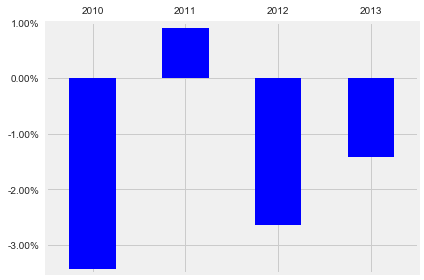

In [2420]:
ax = USorder_valuelifts.plot(kind="bar", color = "blue", ylim = [-0.035,0.01])
years =[2010,2011,2012,2013]
x = [0,1,2,3];
plt.xticks(x, years, rotation='horizontal');
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]);
ax.xaxis.tick_top()

plt.tight_layout()
plt.savefig("Order value US.png", transparent = True)

## Average Visitor Value

In [2421]:
USconversionlifts

0    0.108945
1    0.089359
2    0.051261
3    0.068594
dtype: float64

In [2422]:
USorder_valuelifts

0   -0.034296
1    0.008938
2   -0.026356
3   -0.014182
dtype: float64

In [2423]:
USvaluelift= (USconversionlifts+1)*(USorder_valuelifts+1)-1

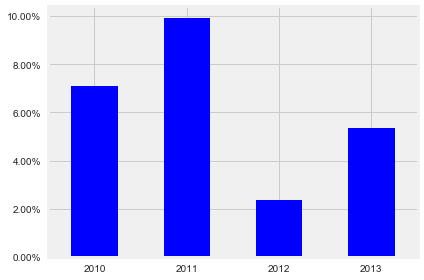

In [2424]:
ax = USvaluelift.plot(kind="bar", color = "Blue")
years =[2010,2011,2012,2013]
x = [0,1,2,3];
plt.xticks(x, years, rotation='horizontal');
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]);


plt.tight_layout()
plt.savefig("Visitor value US.png", transparent = True)

# Average Order Value UK

In [2425]:
UKorder_value2010 = df2010UK.groupby(['date', 'country']).mean()["average order value"].unstack()
UKorder_value2011 = df2011UK.groupby(['date', 'country']).mean()['average order value'].unstack()
UKorder_value2012 = df2012UK.groupby(['date', 'country']).mean()['average order value'].unstack()
UKorder_value2013 = df2013UK.groupby(['date', 'country']).mean()['average order value'].unstack()



In [2426]:
UKorder_value2010.head()

country,United Kingdom
date,
2010-02-01,241.178926
2010-02-02,244.507954
2010-02-03,253.220936
2010-02-04,263.706286
2010-02-05,231.761697


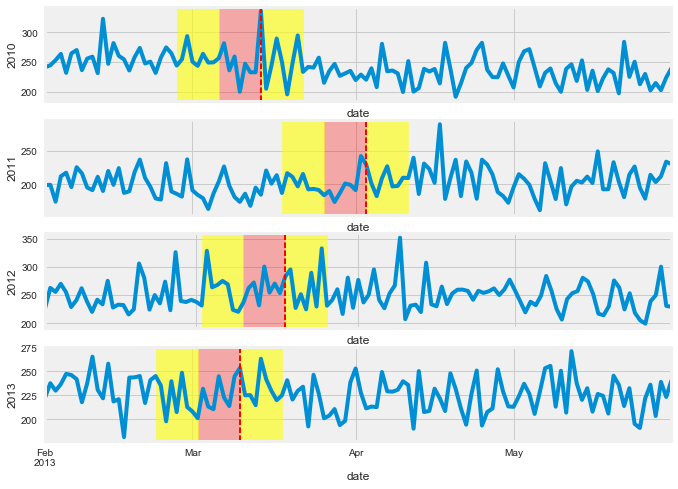

In [2427]:
fig, axes = plt.subplots(nrows = 4 , ncols=1, figsize = (10,8))
ymax = 0.065
ymin = 0.03

fig1 = UKorder_value2010.plot(ax = axes[0]);
fig1.tick_params(labelbottom='off')  
# fig1.axes.xaxis.set_visible(False)
fig1.set_ylabel('2010')
fig1.axvline(pd.to_datetime('2010-03-14'), color='r', linestyle='--', lw=2)
fig1.axvspan('2010-03-06','2010-03-14', color='red', alpha=0.3)
fig1.axvspan('2010-02-26','2010-03-06', color='yellow', alpha=0.6)
fig1.axvspan('2010-03-14','2010-03-22', color='yellow', alpha=0.6)
# vals = fig1.get_yticks()
# fig1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig1.legend_.remove()

fig2 = UKorder_value2011.plot(ax = axes[1]);
# fig2.axes.xaxis.set_visible(False)
fig2.tick_params(labelbottom='off') 
fig2.set_ylabel('2011')
fig2.axvline(pd.to_datetime('2011-04-03'), color='r', linestyle='--', lw=2)
fig2.axvspan('2011-03-26','2011-04-03', color='red', alpha=0.3)
fig2.axvspan('2011-03-18','2011-03-26', color='yellow', alpha=0.6)
fig2.axvspan('2011-04-03','2011-04-11', color='yellow', alpha=0.6)
# vals = fig2.get_yticks()
# fig2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig2.legend_.remove()

fig3 = UKorder_value2012.plot(ax = axes[2]);
fig3.tick_params(labelbottom='off') 
# fig3.axes.xaxis.set_visible(False)
fig3.set_ylabel('2012')
fig3.axvline(pd.to_datetime('2012-03-18'), color='r', linestyle='--', lw=2)
fig3.axvspan('2012-03-10','2012-03-18', color='red', alpha=0.3)
fig3.axvspan('2012-03-02','2012-03-10', color='yellow', alpha=0.6)
fig3.axvspan('2012-03-18','2012-03-26', color='yellow', alpha=0.6)
# vals = fig3.get_yticks()
# fig3.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig3.legend_.remove()

fig4 = UKorder_value2013.plot(ax = axes[3]);
fig4.set_ylabel('2013')
fig4.axvline(pd.to_datetime('2013-03-10'), color='r', linestyle='--', lw=2)
fig4.axvspan('2013-03-02','2013-03-10', color='red', alpha=0.3)
fig4.axvspan('2013-02-22','2013-03-02', color='yellow', alpha=0.6)
fig4.axvspan('2013-03-10','2013-03-18', color='yellow', alpha=0.6)
# vals = fig4.get_yticks()
# fig4.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig4.legend_.remove()

# xfmt = mdates.DateFormatter('%d-%m')
# fig4.xaxis.set_major_formatter(xfmt)

fig.savefig("UK_order_value_percent.png", transparent=True)


In [2428]:
mothersweek2010 =UKorder_value2010['2010-03-05':'2010-03-12'].mean().values[0]
around_mothersweek2010 = np.mean([UKorder_value2010['2010-02-28':'2010-03-04'].mean().values[0],UKorder_value2010['2010-03-13':'2010-03-20'].mean().values[0]])
UKorder_valuelift2010 = (mothersweek2010-around_mothersweek2010)/mothersweek2010

mothersweek2011 =UKorder_value2011['2011-03-24':'2011-04-01'].mean().values[0]
around_mothersweek2011 = np.mean([UKorder_value2011['2011-03-12':'2011-03-23'].mean().values[0],UKorder_value2011['2011-04-02':'2011-04-09'].mean().values[0]])
UKorder_valuelift2011 = (mothersweek2011-around_mothersweek2011)/mothersweek2011

mothersweek2012 =UKorder_value2012['2012-03-10':'2012-03-18'].mean().values[0]
around_mothersweek2012 = np.mean([UKorder_value2012['2012-03-02':'2012-05-09'].mean().values[0],UKorder_value2012['2012-03-19':'2012-03-25'].mean().values[0]])
UKorder_valuelift2012 = (mothersweek2012-around_mothersweek2012)/mothersweek2012

mothersweek2013 =UKorder_value2013['2013-02-28':'2013-03-08'].mean().values[0]
around_mothersweek2013 = np.mean([UKorder_value2013['2013-02-20':'2013-03-27'].mean().values[0],UKorder_value2013['2013-03-09':'2013-03-16'].mean().values[0]])
UKorder_valuelift2013 = (mothersweek2013-around_mothersweek2013)/mothersweek2013


In [2429]:
UKorder_valuelifts=pd.Series([UKorder_valuelift2010,UKorder_valuelift2011,UKorder_valuelift2012,UKorder_valuelift2013])
UKorder_valuelifts

0   -0.040000
1   -0.080729
2    0.011332
3   -0.063502
dtype: float64

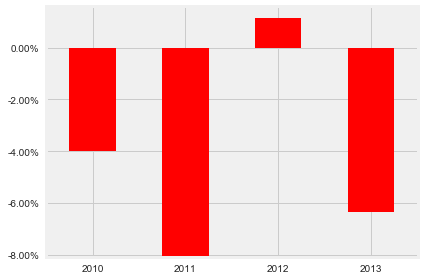

In [2430]:
ax = UKorder_valuelifts.plot(kind="bar", color = "red")
years =[2010,2011,2012,2013]
x = [0,1,2,3];
plt.xticks(x, years, rotation='horizontal');
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]);

plt.tight_layout()
plt.savefig("Order value US.png", transparent = True)

# US Valentine's Day

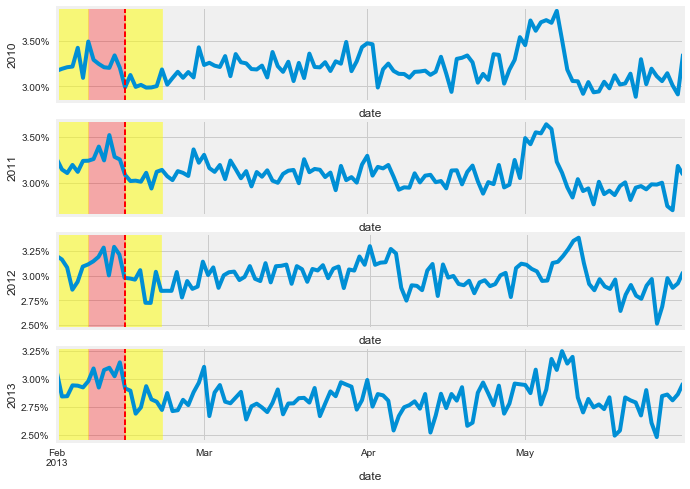

In [2431]:
fig, axes = plt.subplots(nrows = 4 , ncols=1, figsize = (10,8))
ymax = 0.052
ymin = 0.03

fig1 = USconversion2010.plot(ax = axes[0]);
fig1.tick_params(labelbottom='off')
fig1.set_ylabel('2010')
fig1.axvspan('2010-02-07','2010-02-14', color='red', alpha=0.3)
fig1.axvspan('2010-01-29','2010-02-07', color='yellow', alpha=0.5)
fig1.axvspan('2010-02-14','2010-02-21', color='yellow', alpha=0.5)
fig1.axvline(pd.to_datetime('2010-02-14'), color='r', linestyle='--', lw=2)
vals = fig1.get_yticks()
fig1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig1.legend_.remove()

fig2 = USconversion2011.plot(ax = axes[1]);
fig2.tick_params(labelbottom='off')
fig2.set_ylabel('2011')
fig2.axvline(pd.to_datetime('2011-02-14'), color='r', linestyle='--', lw=2)
fig2.axvspan('2011-02-07','2011-02-14', color='red', alpha=0.3)
fig2.axvspan('2011-02-01','2011-02-07', color='yellow', alpha=0.5)
fig2.axvspan('2011-02-14','2011-02-21', color='yellow', alpha=0.5)
vals = fig2.get_yticks()
fig2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig2.legend_.remove()

fig3 = USconversion2012.plot(ax = axes[2]);
fig3.tick_params(labelbottom='off')
fig3.set_ylabel('2012')
fig3.axvline(pd.to_datetime('2012-02-14'), color='r', linestyle='--', lw=2)
fig3.axvspan('2012-02-07','2012-02-14', color='red', alpha=0.3)
fig3.axvspan('2012-01-30','2012-02-07', color='yellow', alpha=0.5)
fig3.axvspan('2012-02-14','2012-02-21', color='yellow', alpha=0.5)
vals = fig3.get_yticks()
fig3.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig3.legend_.remove()

fig4 = USconversion2013.plot(ax = axes[3]);
fig4.set_ylabel('2013')
fig4.axvline(pd.to_datetime('2013-02-14'), color='r', linestyle='--', lw=2)
fig4.axvspan('2013-02-07','2013-02-14', color='red', alpha=0.3)
fig4.axvspan('2013-01-30','2013-02-07', color='yellow', alpha=0.5)
fig4.axvspan('2013-02-14','2013-02-21', color='yellow', alpha=0.5)
vals = fig4.get_yticks()
fig4.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig4.legend_.remove()
fig4.xaxis.grid(True)

# xfmt = mdates.DateFormatter('%d-%m')
# fig4.xaxis.set_major_formatter(xfmt)

fig.savefig("US_conversion_percent.png", transparent=True)

In [2432]:
valentines2010 =USconversion2010['2010-02-06':'2010-02-13'].mean().values[0]
around_valentines2010 = USconversion2010.mean().values[0]
USconversionlift2010 = (valentines2010-around_valentines2010)/valentines2010

valentines2011 =USconversion2011['2011-02-07':'2011-02-14'].mean().values[0]
around_valentines2011 = USconversion2011.mean().values[0]
USconversionlift2011 = (valentines2011-around_valentines2011)/valentines2011

valentines2012 =USconversion2012['2012-02-07':'2012-02-14'].mean().values[0]
around_valentines2012 = USconversion2012.mean().values[0]
USconversionlift2012 = (valentines2012-around_valentines2012)/valentines2012

valentines2013 =USconversion2013['2013-02-07':'2013-02-14'].mean().values[0]
around_valentines2013 = USconversion2013.mean().values[0]
USconversionlift2013 = (valentines2013-around_valentines2013)/valentines2013



In [2433]:
US_valentines_lifts=pd.Series([USconversionlift2010,USconversionlift2011,USconversionlift2012,USconversionlift2013])
US_valentines_lift=pd.Series([USconversionlift2010,USconversionlift2011,USconversionlift2012,USconversionlift2013]).mean()
US_valentines_lift
US_valentines_conversion_lift = US_valentines_lift

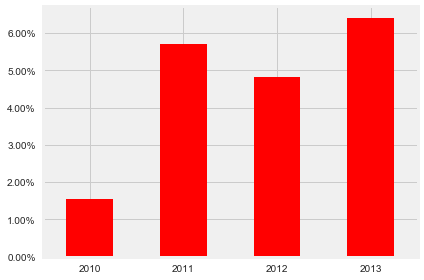

In [2434]:
ax = US_valentines_lifts.plot(kind="bar", color ="red")
years =[2010,2011,2012,2013]
x = [0,1,2,3];
plt.xticks(x, years, rotation='horizontal');
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]);
plt.tight_layout()
plt.savefig("US conversion bar chart (Valentines).png", transparent= True)

# UK Valentines Day

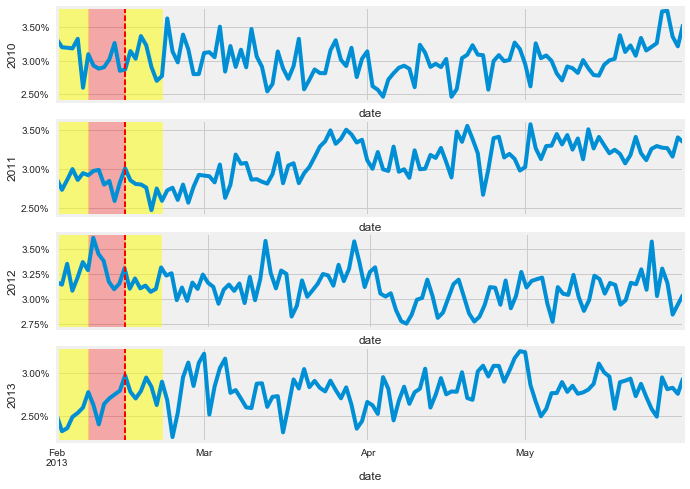

In [2435]:
fig, axes = plt.subplots(nrows = 4 , ncols=1, figsize = (10,8))
ymax = 0.052
ymin = 0.03

fig1 = UKconversion2010.plot(ax = axes[0]);
fig1.tick_params(labelbottom='off')
fig1.set_ylabel('2010')
fig1.axvspan('2010-02-07','2010-02-14', color='red', alpha=0.3)
fig1.axvspan('2010-01-29','2010-02-07', color='yellow', alpha=0.5)
fig1.axvspan('2010-02-14','2010-02-21', color='yellow', alpha=0.5)
fig1.axvline(pd.to_datetime('2010-02-14'), color='r', linestyle='--', lw=2)
vals = fig1.get_yticks()
fig1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig1.legend_.remove()

fig2 = UKconversion2011.plot(ax = axes[1]);
fig2.tick_params(labelbottom='off')
fig2.set_ylabel('2011')
fig2.axvline(pd.to_datetime('2011-02-14'), color='r', linestyle='--', lw=2)
fig2.axvspan('2011-02-07','2011-02-14', color='red', alpha=0.3)
fig2.axvspan('2011-02-01','2011-02-07', color='yellow', alpha=0.5)
fig2.axvspan('2011-02-14','2011-02-21', color='yellow', alpha=0.5)
vals = fig2.get_yticks()
fig2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig2.legend_.remove()

fig3 = UKconversion2012.plot(ax = axes[2]);
fig3.tick_params(labelbottom='off')
fig3.set_ylabel('2012')
fig3.axvline(pd.to_datetime('2012-02-14'), color='r', linestyle='--', lw=2)
fig3.axvspan('2012-02-07','2012-02-14', color='red', alpha=0.3)
fig3.axvspan('2012-01-30','2012-02-07', color='yellow', alpha=0.5)
fig3.axvspan('2012-02-14','2012-02-21', color='yellow', alpha=0.5)
vals = fig3.get_yticks()
fig3.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig3.legend_.remove()

fig4 = UKconversion2013.plot(ax = axes[3]);
fig4.set_ylabel('2013')
fig4.axvline(pd.to_datetime('2013-02-14'), color='r', linestyle='--', lw=2)
fig4.axvspan('2013-02-07','2013-02-14', color='red', alpha=0.3)
fig4.axvspan('2013-01-30','2013-02-07', color='yellow', alpha=0.5)
fig4.axvspan('2013-02-14','2013-02-21', color='yellow', alpha=0.5)
vals = fig4.get_yticks()
fig4.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
fig4.legend_.remove()
fig4.xaxis.grid(True)

# xfmt = mdates.DateFormatter('%d-%m')
# fig4.xaxis.set_major_formatter(xfmt)

fig.savefig("US_conversion_percent.png", transparent=True)


In [2436]:
valentines2010 =UKconversion2010['2010-02-07':'2010-02-14'].mean().values[0]
around_valentines2010 = UKconversion2010.mean().values[0]
UKconversionlift2010 = (valentines2010-around_valentines2010)/valentines2010

valentines2011 =UKconversion2011['2011-02-07':'2011-02-14'].mean().values[0]
around_valentines2011 = UKconversion2011.mean().values[0]
UKconversionlift2011 = (valentines2011-around_valentines2011)/valentines2011

valentines2012 =UKconversion2012['2012-02-07':'2012-02-14'].mean().values[0]
around_valentines2012 = UKconversion2012.mean().values[0]
UKconversionlift2012 = (valentines2012-around_valentines2012)/valentines2012

valentines2013 =UKconversion2013['2013-02-07':'2013-02-14'].mean().values[0]
around_valentines2013 = UKconversion2013.mean().values[0]
UKconversionlift2013 = (valentines2013-around_valentines2013)/valentines2013


In [2437]:
UK_valentines_lifts=pd.Series([UKconversionlift2010,UKconversionlift2011,UKconversionlift2012,UKconversionlift2013])
UK_valentines_lift=UK_valentines_lifts.mean()
UK_valentines_lifts


0   -0.012591
1   -0.073785
2    0.056918
3   -0.028162
dtype: float64

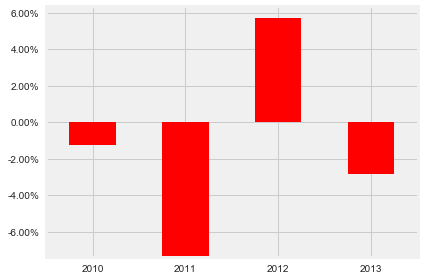

In [2438]:
ax = UK_valentines_lifts.plot(kind="bar", color ="red")
years =[2010,2011,2012,2013]
x = [0,1,2,3];
plt.xticks(x, years, rotation='horizontal');
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]);
plt.tight_layout()
plt.savefig("UK conversion bar chart (Valentines).png", transparent= True)

In [2439]:
US_valentines_lift
US_valentines_conversion_lift = US_valentines_lift

In [2440]:
UK_valentines_lift

-0.014405197796714118

In [2441]:
valentines_lifts = pd.Series([US_valentines_lift,UK_valentines_lift])

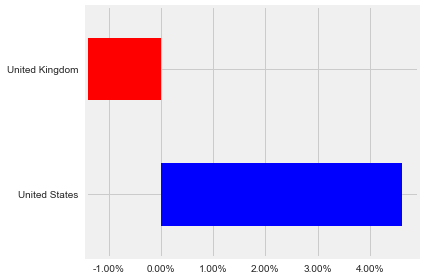

In [2442]:
ax = valentines_lifts.plot(kind= "barh", color=["blue","red"])
countries =["United Kingdom", "United States"]
y = [1,0];
plt.yticks(y, countries, rotation='horizontal');
vals = ax.get_xticks();
ax.set_xticklabels(['{:3.2f}%'.format(x*100) for x in vals]);
plt.tight_layout()
plt.savefig("Valentines Lift comparison.png", transparent = True)

# Valentines Day Order Value US

In [2443]:
valentines2010 =USorder_value2010['2010-02-07':'2010-02-14'].mean().values[0]
around_valentines2010 = USorder_value2010.mean().values[0]
USorder_valuelift2010 = (valentines2010-around_valentines2010)/valentines2010

valentines2011 =USorder_value2011['2011-02-07':'2011-02-14'].mean().values[0]
around_valentines2011 = USorder_value2011.mean().values[0]
USorder_valuelift2011 = (valentines2011-around_valentines2011)/valentines2011

valentines2012 =USorder_value2012['2012-02-07':'2012-02-14'].mean().values[0]
around_valentines2012 = USorder_value2012.mean().values[0]
USorder_valuelift2012 = (valentines2012-around_valentines2012)/valentines2012

valentines2013 =USorder_value2013['2013-02-07':'2013-02-14'].mean().values[0]
around_valentines2013 = USorder_value2013.mean().values[0]
USorder_valuelift2013 = (valentines2013-around_valentines2013)/valentines2013


In [2444]:
US_valentines_lifts=pd.Series([USorder_valuelift2010,USorder_valuelift2011,USorder_valuelift2012,USorder_valuelift2013])
US_valentines_lift=pd.Series([USorder_valuelift2010,USorder_valuelift2011,USorder_valuelift2012,USorder_valuelift2013]).mean()
US_valentines_lift


-0.033376392310720836

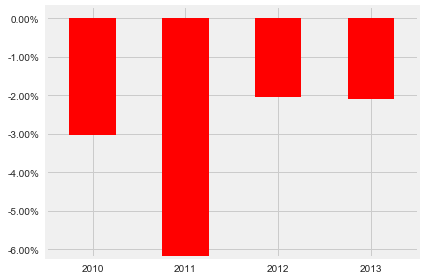

In [2445]:
ax = US_valentines_lifts.plot(kind="bar", color ="red")
years =[2010,2011,2012,2013]
x = [0,1,2,3];
plt.xticks(x, years, rotation='horizontal');
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]);
plt.tight_layout()
plt.savefig("US conversion bar chart (Valentines).png", transparent= True)

In [2446]:
US_valentines_lifts.mean()

-0.033376392310720836

# UK Order Value Change

In [2447]:
valentines2010 =UKorder_value2010['2010-02-07':'2010-02-14'].mean().values[0]
around_valentines2010 = UKorder_value2010.mean().values[0]
UKorder_valuelift2010 = (valentines2010-around_valentines2010)/valentines2010

valentines2011 =UKorder_value2011['2011-02-07':'2011-02-14'].mean().values[0]
around_valentines2011 = UKorder_value2011.mean().values[0]
UKorder_valuelift2011 = (valentines2011-around_valentines2011)/valentines2011

valentines2012 =UKorder_value2012['2012-02-07':'2012-02-14'].mean().values[0]
around_valentines2012 = UKorder_value2012.mean().values[0]
UKorder_valuelift2012 = (valentines2012-around_valentines2012)/valentines2012

valentines2013 =UKorder_value2013['2013-02-07':'2013-02-14'].mean().values[0]
around_valentines2013 = UKorder_value2013.mean().values[0]
UKorder_valuelift2013 = (valentines2013-around_valentines2013)/valentines2013


In [2448]:
UK_valentines_lifts=pd.Series([UKorder_valuelift2010,UKorder_valuelift2011,UKorder_valuelift2012,UKorder_valuelift2013])
UK_valentines_lift=pd.Series([UKorder_valuelift2010,UKorder_valuelift2011,UKorder_valuelift2012,UKorder_valuelift2013]).mean()
UK_valentines_lifts


0    0.083173
1    0.015040
2   -0.033612
3    0.042865
dtype: float64

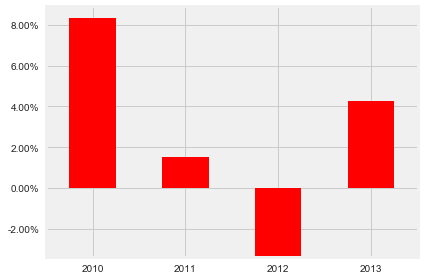

In [2449]:
ax = UK_valentines_lifts.plot(kind="bar", color ="red")
years =[2010,2011,2012,2013]
x = [0,1,2,3];
plt.xticks(x, years, rotation='horizontal');
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals]);
plt.tight_layout()
plt.savefig("UK Valentines value chart (Valentines).png", transparent= True)

# US Mothers Day VS Valentines Day

In [2451]:
US_conversion_lifts = pd.Series([US_valentines_conversion_lift,USconversionlift_Mothers_day])
US_conversion_lifts

0    0.046114
1    0.079540
dtype: float64

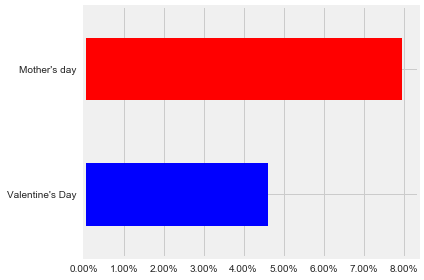

In [2453]:
ax = US_conversion_lifts.plot(kind= "barh", color=["blue","red"])
countries =["Mother's day", "Valentine's Day"]
y = [1,0];
plt.yticks(y, countries, rotation='horizontal');
vals = ax.get_xticks();
ax.set_xticklabels(['{:3.2f}%'.format(x*100) for x in vals]);
plt.tight_layout()
plt.savefig("Holiday lifts comparison.png", transparent = True)